In [14]:
import numpy as np
import cupy as cp
def zca_whiten(X):
    """
    Applies ZCA whitening to the data (X)
    http://xcorr.net/2011/05/27/whiten-a-matrix-matlab-code/

    X: numpy 2d array
        input data, rows are data points, columns are features

    Returns: ZCA whitened 2d array
    """
    assert(X.ndim == 2)
    EPS = 10e-5

    #   covariance matrix
    cov = np.dot(X.T, X)
    #   d = (lambda1, lambda2, ..., lambdaN)
    d, E = np.linalg.eigh(cov)
    #   D = diag(d) ^ (-1/2)
    D = np.diag(1. / np.sqrt(d + EPS))
    #   W_zca = E * D * E.T
    W = np.dot(np.dot(E, D), E.T)

    X_white = np.dot(X, W)

    return X_white

In [2]:
import cv2
 
def read_video(path):
    cap = cv2.VideoCapture(path)
    if (cap.isOpened()== False): 
        print("Error opening video stream or file")
    
    # Read until video is completed
    frames = None
    while(cap.isOpened()):
    # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
           break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.resize(frame, (96,128))
        frame = frame[np.newaxis,:,:].astype(np.float32)/255.0
        frames = frame if frames is None else np.concatenate((frames,frame),axis=0)
    
    cap.release()
    return frames

frames = read_video('/home/ji/Dropbox/Robotics/ENPM809K_Fundamentals_in_AI_and_DL/Data_Test/Data_2023-10-22_11-33-39.avi')

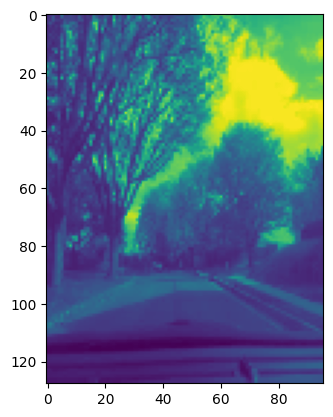

In [7]:
import matplotlib.pyplot as plt

plt.imshow(frames[0,:,:])
plt.show()

In [12]:
frames1 = np.reshape(frames,(frames.shape[0],-1))

In [15]:
frames_w = zca_whiten(np.reshape(frames,(frames.shape[0],-1)))